## Import Dataset
* Read all the data files from previous seasons
* Concatenate the data from the files together
* Import the concatenated data into a data frame

In [1]:
import pandas as pd
from glob import glob

all_df = []
for file in glob('data/seasons/season*.csv'):
    df = pd.read_csv(file)
    print(file, df.shape)
    all_df.append(df)

concat_df = pd.concat(all_df, axis=0, sort=False)
concat_df.to_csv('data/all_seasons.csv', index=None)
    
data = pd.read_csv('data/all_seasons.csv')
print(data.shape[0], 'matches')
data.head()

data/seasons/season-1920.csv (199, 106)
data/seasons/season-1314.csv (380, 68)
data/seasons/season-1112.csv (380, 71)
data/seasons/season-1516.csv (380, 65)
data/seasons/season-1617.csv (380, 65)
data/seasons/season-1415.csv (380, 68)
data/seasons/season-0910.csv (380, 71)
data/seasons/season-1213.csv (380, 74)
data/seasons/season-1011.csv (380, 71)
data/seasons/season-1819.csv (380, 62)
data/seasons/season-1718.csv (380, 65)
3999 matches


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAvAHA,GBH,GBD,GBA,SBH,SBD,SBA,BSH,BSD,BSA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Obtain team names
* Read the current season's data file
* Obtain the list of home teams from the records
* Find the unique teams from the home teams list

In [2]:
curr_df = pd.read_csv('data/seasons/season-1920.csv')

home_teams = curr_df['HomeTeam']

teams = []
for t in home_teams:
    if t not in teams:
        teams.append(t)
        
teams_df = pd.DataFrame(teams, columns=["Teams"])
display(teams_df)
teams_df.to_csv('data/teams.csv', index=None)

,Teams
0,Liverpool
1,West Ham
2,Bournemouth
3,Burnley
4,Crystal Palace
5,Watford
6,Tottenham
7,Leicester
8,Newcastle
9,Man United


## Analyse the data

### Inspect the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Columns: 139 entries, Div to BSA
dtypes: float64(115), int64(16), object(8)
memory usage: 4.2+ MB


### Keep required columns

In [4]:
req_cols = ['Date', 'Referee', 'HomeTeam', 'AwayTeam', 
            'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR',
            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 
            'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
data = data[req_cols]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
Date        3999 non-null object
Referee     3999 non-null object
HomeTeam    3999 non-null object
AwayTeam    3999 non-null object
HTHG        3999 non-null int64
HTAG        3999 non-null int64
HTR         3999 non-null object
FTHG        3999 non-null int64
FTAG        3999 non-null int64
FTR         3999 non-null object
HS          3999 non-null int64
AS          3999 non-null int64
HST         3999 non-null int64
AST         3999 non-null int64
HC          3999 non-null int64
AC          3999 non-null int64
HF          3999 non-null int64
AF          3999 non-null int64
HY          3999 non-null int64
AY          3999 non-null int64
HR          3999 non-null int64
AR          3999 non-null int64
dtypes: int64(16), object(6)
memory usage: 687.5+ KB


### Home Team win rate

In [5]:
total_matches = data.shape[0]
print('Total matches:', total_matches)

total_home_wins = len(data[data['FTR'] == 'H'])
print('Total Home team wins:', total_home_wins)

home_wins_rate = (total_home_wins/total_matches)*100
print('Home wins rate:', home_wins_rate,'%')

Total matches: 3999
Total Home team wins: 1844
Home wins rate: 46.111527881970495 %


### Team-wise data

In [6]:
def getData(team):
    print('\n______________', team, '______________\n')
    
    home_games = data[data['HomeTeam'] == team]
    away_games = data[data['AwayTeam'] == team]
    total_games = home_games.append(away_games)
    num_games = len(total_games.index)
    print('Total games played:', num_games)
    
    games_won = total_games[total_games['FTR'] == 'H']
    num_games_won = len(games_won.index)
    print('Total games won:', num_games_won)
    games_lost = total_games[total_games['FTR'] == 'A']
    num_games_lost = len(games_lost.index)
    print('Total games lost:', num_games_lost)
    games_drawn = total_games[total_games['FTR'] == 'D']
    num_games_drawn = len(games_drawn.index)
    print('Total games drawn:', num_games_drawn)
    
    games_won_rate = 0
    games_lost_rate = 0
    games_drawn_rate = 0
    if num_games != 0:
        games_won_rate = num_games_won / num_games
        print('Win percentage:', games_won_rate*100,'%')
        games_lost_rate = num_games_lost / num_games
        print('Lose percentage:', games_lost_rate*100,'%')
        games_drawn_rate = num_games_drawn / num_games
        print('Draw percentage:', games_drawn_rate*100,'%')
    
    home_goals = home_games['FTHG'].sum()
    away_goals = home_games['FTAG'].sum()
    total_goals = home_goals + away_goals
    print('Total goals scored:', total_goals)
    
    home_goals_conc = home_games['FTAG'].sum()
    away_goals_conc = home_games['FTHG'].sum()
    total_goals_conc = home_goals_conc + away_goals_conc
    print('Total goals conceded:', total_goals_conc)
    
    if num_games != 0:
        GPG = total_goals / num_games
        print('Goals scored per game:', GPG)
        GCPG = total_goals_conc / num_games
        print('Goals conceded per game:', GCPG)
    
    home_shots = home_games['HS'].sum()
    away_shots = away_games['AS'].sum()
    total_shots = home_shots + away_shots
    print('Total shots hit:', total_shots)
    
    home_shots_ontarget = home_games['HST'].sum()
    away_shots_ontarget = away_games['AST'].sum()
    total_shots_ontarget = home_shots_ontarget + away_shots_ontarget
    print('Total shots on target:', total_shots_ontarget)
    
    home_shots_against = home_games['AS'].sum()
    away_shots_against = away_games['HS'].sum()
    total_shots_against = home_shots_against + away_shots_against
    print('Total shots allowed:', total_shots_against)
    
    if num_games != 0:
        HSPG = home_shots / num_games
        print('Shots taken per game:', HSPG)
        ASPG = away_goals / num_games
        print('Shots allowed per game:', ASPG)
    
    scoring_rate = 0
    if total_shots != 0:
        scoring_rate = (total_shots - total_goals) / total_shots
    print('Goal Scoring percentage:', scoring_rate*100,'%')
    
    home_yellow_cards = home_games['HY'].sum()
    away_yellow_cards = away_games['AY'].sum()
    total_yellow_cards = home_yellow_cards + away_yellow_cards
    print('Total yellow cards received:', total_yellow_cards)
    
    home_red_cards = home_games['HR'].sum()
    away_red_cards = away_games['AR'].sum()
    total_red_cards = home_red_cards + away_red_cards
    print('Total red cards received:', total_red_cards)
    
    home_fouls = home_games['HF'].sum()
    away_fouls = away_games['AF'].sum()
    total_fouls = home_fouls + away_fouls
    print('Total fouls committed:', total_fouls)
    
    if num_games == 0: 
        games_won = 0
        games_lost = 0
        games_drawn = 0 
        total_goals = 0 
        total_shots_ontarget = 0 
        total_goals_conc = 0 
        total_yellow_cards = 0 
        total_red_cards = 0 
        total_fouls = 0 
        total_shots = 0 
        total_shots_against = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        scoring_rate = 0 
        
    return [team, num_games, num_games_won, games_won_rate, num_games_lost, 
            num_games_drawn, total_goals, scoring_rate, total_goals_conc, 
            total_shots, total_shots_ontarget, total_shots_against, 
            total_fouls, total_yellow_cards, total_red_cards]

In [7]:
getData('Man United')


______________ Man United ______________

Total games played: 400
Total games won: 190
Total games lost: 122
Total games drawn: 88
Win percentage: 47.5 %
Lose percentage: 30.5 %
Draw percentage: 22.0 %
Total goals scored: 575
Total goals conceded: 575
Goals scored per game: 1.4375
Goals conceded per game: 1.4375
Total shots hit: 5656
Total shots on target: 2558
Total shots allowed: 4399
Shots taken per game: 7.9825
Shots allowed per game: 0.4075
Goal Scoring percentage: 89.83380480905232 %
Total yellow cards received: 666
Total red cards received: 25
Total fouls committed: 4416


['Man United',
 400,
 190,
 0.475,
 122,
 88,
 575,
 0.8983380480905233,
 575,
 5656,
 2558,
 4399,
 4416,
 666,
 25]

In [8]:
stat_list = []
for team in teams:
    stat = getData(team)
    stat_list.append(stat)
    
team_stats = pd.DataFrame(
    stat_list, 
    columns=['Team', 'Games', 'Wins', 'Win Rate', 'Losses', 'Draws', 
            'Goals scored', 'Scoring rate', 'Goals conceded', 
            'Shots', 'Shots on Target', 'Shots against', 'Fouls', 
            'Yellow Cards', 'Red Cards'])


______________ Liverpool ______________

Total games played: 399
Total games won: 188
Total games lost: 116
Total games drawn: 95
Win percentage: 47.11779448621554 %
Lose percentage: 29.07268170426065 %
Draw percentage: 23.809523809523807 %
Total goals scored: 593
Total goals conceded: 593
Goals scored per game: 1.4862155388471179
Goals conceded per game: 1.4862155388471179
Total shots hit: 6295
Total shots on target: 2739
Total shots allowed: 3861
Shots taken per game: 8.899749373433584
Shots allowed per game: 0.42105263157894735
Goal Scoring percentage: 90.57982525814138 %
Total yellow cards received: 565
Total red cards received: 25
Total fouls committed: 4055

______________ West Ham ______________

Total games played: 361
Total games won: 163
Total games lost: 101
Total games drawn: 97
Win percentage: 45.15235457063712 %
Lose percentage: 27.977839335180054 %
Draw percentage: 26.869806094182824 %
Total goals scored: 514
Total goals conceded: 514
Goals scored per game: 1.4238227146

Total games played: 400
Total games won: 186
Total games lost: 93
Total games drawn: 121
Win percentage: 46.5 %
Lose percentage: 23.25 %
Draw percentage: 30.25 %
Total goals scored: 555
Total goals conceded: 555
Goals scored per game: 1.3875
Goals conceded per game: 1.3875
Total shots hit: 5219
Total shots on target: 2278
Total shots allowed: 4831
Shots taken per game: 7.2575
Shots allowed per game: 0.54
Goal Scoring percentage: 89.36577888484383 %
Total yellow cards received: 612
Total red cards received: 30
Total fouls committed: 4445

______________ Norwich ______________

Total games played: 172
Total games won: 83
Total games lost: 44
Total games drawn: 45
Win percentage: 48.25581395348838 %
Lose percentage: 25.581395348837212 %
Draw percentage: 26.16279069767442 %
Total goals scored: 234
Total goals conceded: 234
Goals scored per game: 1.3604651162790697
Goals conceded per game: 1.3604651162790697
Total shots hit: 1956
Total shots on target: 810
Total shots allowed: 2426
Shots ta

In [9]:
display(team_stats)
team_stats.to_csv('data/team_stats.csv')

,Team,Games,Wins,Win Rate,Losses,Draws,Goals scored,Scoring rate,Goals conceded,Shots,Shots on Target,Shots against,Fouls,Yellow Cards,Red Cards
0,Liverpool,399,188,0.471178,116,95,593,0.905798,593,6295,2739,3861,4055,565,25
1,West Ham,361,163,0.451524,101,97,514,0.881540,514,4339,1721,5293,3870,627,26
2,Bournemouth,172,78,0.453488,53,41,256,0.874263,256,2036,692,2353,1594,259,7
3,Burnley,210,102,0.485714,61,47,253,0.882653,253,2156,782,3294,2208,362,7
4,Crystal Palace,248,98,0.395161,97,53,296,0.898526,296,2917,934,3393,2894,417,10
5,Watford,172,81,0.470930,52,39,227,0.884830,227,1971,626,2196,2081,340,18
6,Tottenham,400,187,0.467500,124,89,555,0.911129,555,6245,2787,4476,4152,635,24
7,Leicester,210,98,0.466667,63,49,278,0.894095,278,2625,896,2756,2227,298,18
8,Newcastle,324,157,0.484568,94,73,436,0.888090,436,3896,1598,4133,3535,530,32
9,Man United,400,190,0.475000,122,88,575,0.898338,575,5656,2558,4399,4416,666,25


### Goal scoring analysis

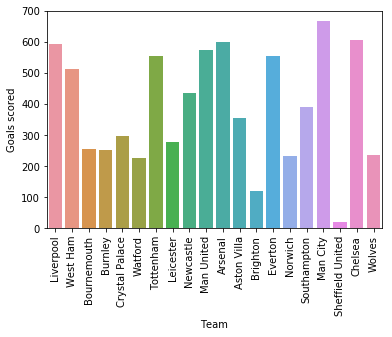

In [10]:
import seaborn as sns

GS = sns.barplot(team_stats['Team'], team_stats['Goals scored'])
for item in GS.get_xticklabels():
    item.set_rotation(90)

### Win Analysis

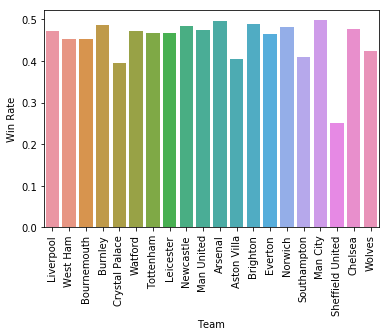

In [11]:
WR = sns.barplot(team_stats['Team'], team_stats['Win Rate'])
for item in WR.get_xticklabels():
    item.set_rotation(90)

### Goals and Shots analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121f0cb00>,
      dtype=object)

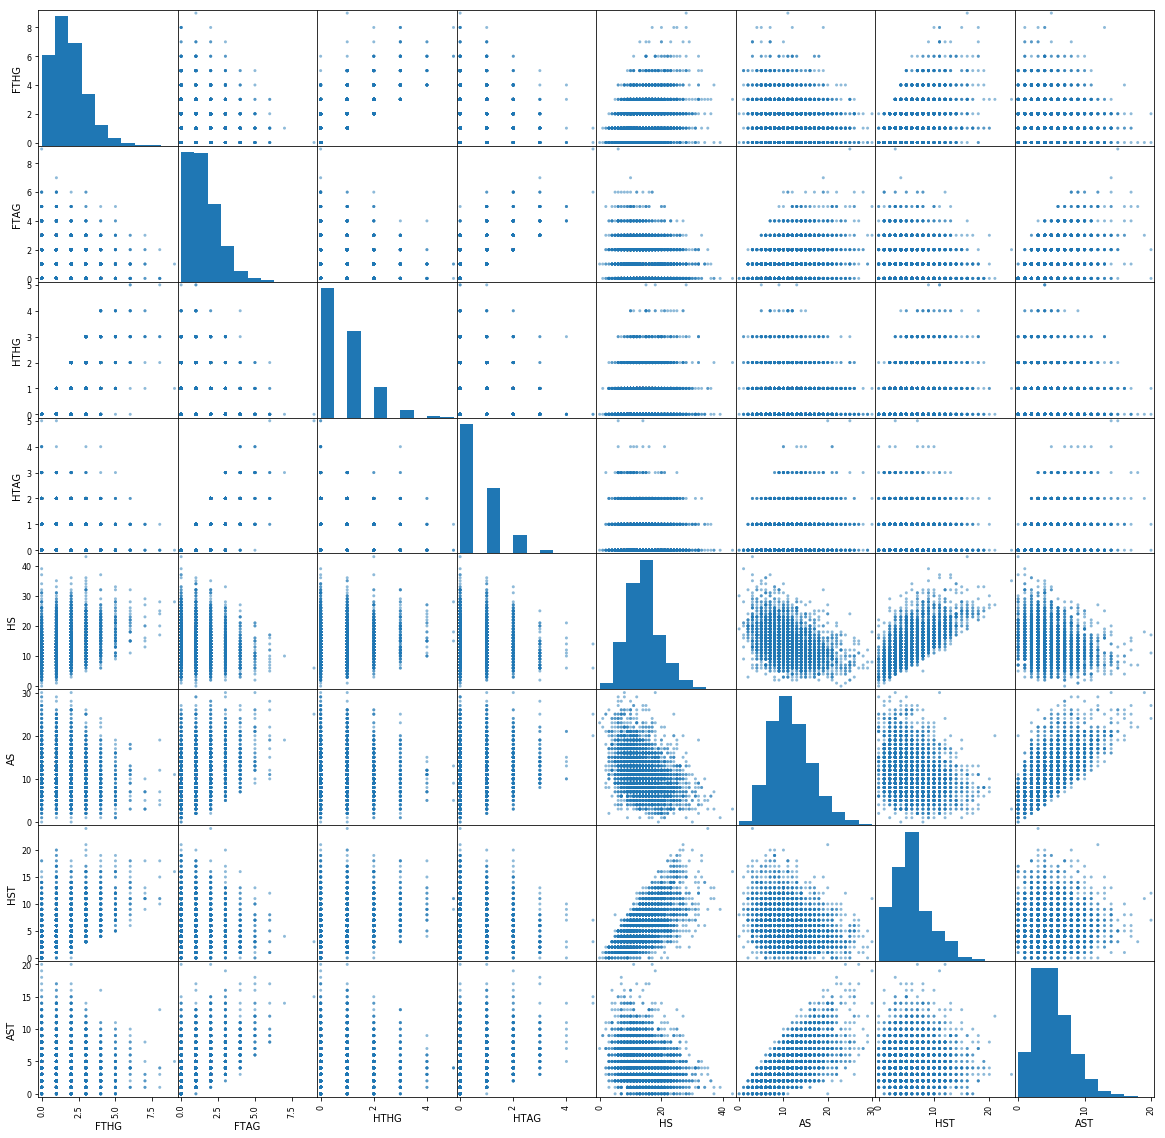

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']], 
               figsize=(20,20))